In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro 

In [3]:
df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
# Shapiro test on Glucose column
shapiro_test = stats.shapiro(df['Glucose'])
print("Shapiro-Wilk p-value: ", shapiro_test.pvalue)

if shapiro_test.pvalue<0.05:
    print("The data likely does not follow a normal distribution.")
else:
    print("The data may be normally distributed, but the q-q plot can provide further insights.")

Shapiro-Wilk p-value:  1.9863474999979633e-11
The data likely does not follow a normal distribution.


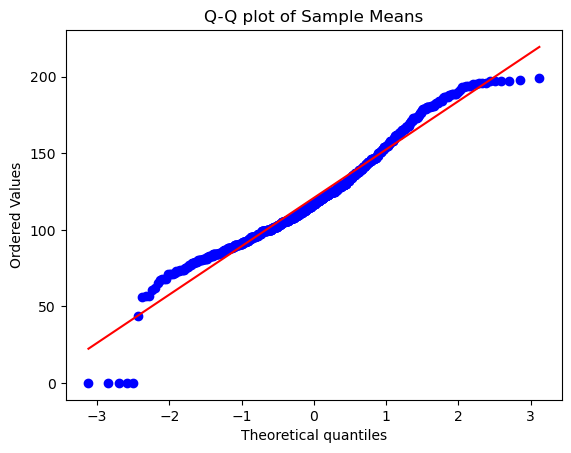

In [7]:
# Generate a Q-Q plot for the sample means
stats.probplot(df['Glucose'], dist="norm", plot=plt)
plt.title("Q-Q plot of Sample Means")
plt.show()

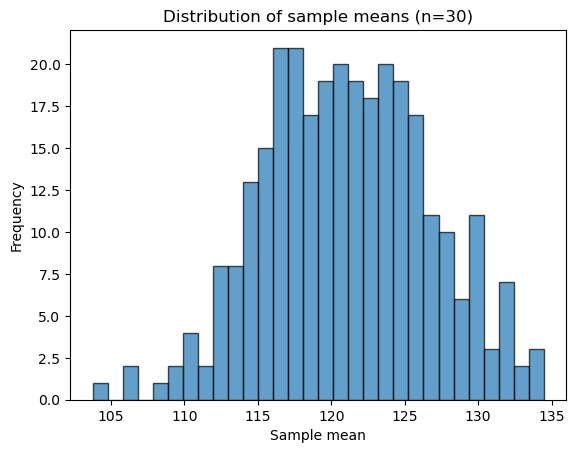

In [36]:
# Central limit theorem
sample_means = []
n_samples = 300
sample_size = 30

for _ in range(n_samples):
    sample = df['Glucose'].sample(n=sample_size, replace=True)
    sample_means.append(sample.mean())

# Plot the distribution of sample means
plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution of sample means (n=30)")
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.show()

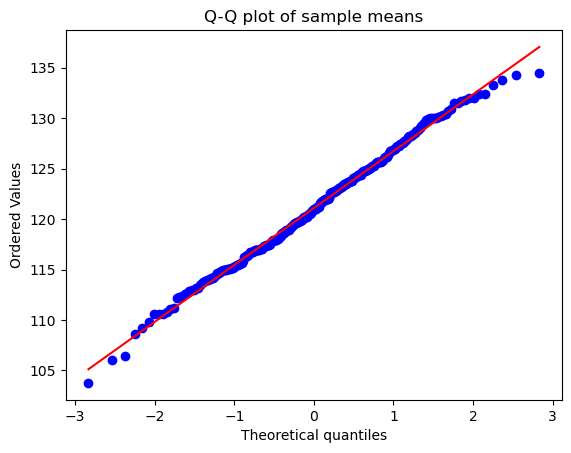

In [38]:
# Generate a Q-Q plot for the sample means
stats.probplot(sample_means, dist="norm", plot=plt)
plt.title('Q-Q plot of sample means')
plt.show()

In [42]:
# Perform the Shapiro-Wilk test on the sample means
shapiro_test = stats.shapiro(sample_means)
print("Shapiro-Wilk p-value:", shapiro_test.pvalue)

# Interpret the result
if shapiro_test.pvalue<0.05:
    print("The data likely does not follow a normal distribution.")
else:
    print("The data may be normally distributed, but the q-q plot can provide further insights.")

Shapiro-Wilk p-value: 0.5183929673444825
The data may be normally distributed, but the q-q plot can provide further insights.
